In [1]:
import os
import zipfile
import numpy as np
from PIL import Image
from datetime import date
import matplotlib.pyplot as plt
import xarray as xr

from snappy import ProductIO, GPF, HashMap, jpy
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

%matplotlib inline

In [2]:
# Parameters

sal = 35.0
temp = 15.0
ozo = 330.0
pres = 1000.0
TSMfakBpart = 1.72
TSMfakBwit = 3.1
CHLexp = 1.04
CHLfak = 21.0
thresholdRtosaOOS = 0.005
thresholdAcReflecOos = 0.1
thresholdCloudTDown865 = 0.955
outputAsRrs = False
deriveRwFromPathAndTransmittance = False
useEcmwfAuxData = True
outputRtoa = True
outputRtosaGc = False
outputRtosaGcAann = False
outputRpath = False
outputTdown = False
outputTup = False
outputAcReflectance = True
outputRhown = True
outputOos = False
outputKd = True
outputUncertainties = True

In [2]:
# read env variables
api = SentinelAPI("",
                  "",
                  "https://finhub.nsdc.fmi.fi/")

In [4]:
def query_products(footprint, start_date, end_date, producttype, maxclouds=100):

    # At least for Sentinel-3 querying for the whole region works.
    # So maybe the problem with querying periods longer than 1 day is only the S2 case 

    products = api.query(footprint,
                         date=(start_date, end_date),
                         # platformname='Sentinel-2', 
                         # cloudcoverpercentage=(0, maxclouds),
                         producttype=producttype)

    return products.keys()

In [3]:
footprint = geojson_to_wkt(read_geojson('indre-oslofjord.geojson'))
platformname = 'Sentinel-2'
start_date = date(2024, 3, 22)
end_date = date(2024, 3, 23)
cloudcoverpercentage=(0, 100)
producttype = 'OL_1_EFR___'

In [37]:
query_products(footprint, start_date, end_date, producttype)

odict_keys(['520d4e49-869b-467d-b7ca-05fc5b9194e5', '22c84761-2162-49e1-9738-1c8a074d6db8', 'ea4a4239-cb6d-4d52-a3ef-a6ca6cfdbdb7', '53fe47d4-1e55-4cb5-8ac9-231cad2aa585'])

In [38]:
# api.download_all_quicklooks(products)

In [4]:
api.download("22c84761-2162-49e1-9738-1c8a074d6db8")

MD5 checksumming:   0%|          | 0.00/873M [00:00<?, ?B/s]

{'id': '22c84761-2162-49e1-9738-1c8a074d6db8',
 'title': 'S3B_OL_1_EFR____20240322T094951_20240322T095251_20240322T204507_0180_091_079_1980_PS2_O_NT_003',
 'size': 872910890,
 'md5': '130c78461e3792e026a17fc68bd33d51',
 'date': datetime.datetime(2024, 3, 22, 9, 49, 51, 407000),
 'footprint': 'POLYGON((-1.30262 52.4588,-0.293245 52.3988,0.720325 52.3283,1.72495 52.2496,2.72166 52.1654,3.71953 52.0698,4.71161 51.9659,5.70212 51.853,6.68224 51.7327,7.66067 51.6065,8.63516 51.4673,9.60135 51.3227,10.5611 51.1729,11.5136 51.0112,12.46 50.8432,13.3978 50.6681,14.3301 50.4847,15.2538 50.2946,16.1731 50.0963,17.0843 49.8925,18.5677 52.4402,20.2235 54.974,22.0868 57.4842,24.208 59.9657,23.0734 60.2201,21.9234 60.4658,20.76 60.7005,19.5738 60.9265,18.3767 61.1406,17.1621 61.3442,15.9293 61.5389,14.6858 61.7175,13.429 61.8872,12.1525 62.0457,10.8722 62.1919,9.5744 62.3269,8.25633 62.4507,6.94345 62.5603,5.60235 62.6589,4.25958 62.7416,2.92569 62.8134,1.5688 62.8731,0.213453 62.9182,-0.155012 60.3

In [5]:
def extract_file(filename):
    try:
        zip_ref = zipfile.ZipFile(filename + '.SAFE.zip', 'r')
        zip_ref.extractall("./data")
        zip_ref.close()
    except zipfile.BadZipfile:
        print("Error")

def read_S3(filename):
    reader = ProductIO.getProductReader('SENTINEL-3')
    return  ProductIO.readProduct('./data/' + filename + '.SEN3')

In [6]:
FILENAME_NO_EXT = "S3B_OL_1_EFR____20240322T094951_20240322T095251_20240322T204507_0180_091_079_1980_PS2_O_NT_003"

extract_file(FILENAME_NO_EXT)
p = read_S3(FILENAME_NO_EXT)

In [34]:
print(list(p.getBandNames()))

['Oa01_radiance', 'Oa01_radiance_unc', 'Oa02_radiance', 'Oa02_radiance_unc', 'Oa03_radiance', 'Oa03_radiance_unc', 'Oa04_radiance', 'Oa04_radiance_unc', 'Oa05_radiance', 'Oa05_radiance_unc', 'Oa06_radiance', 'Oa06_radiance_unc', 'Oa07_radiance', 'Oa07_radiance_unc', 'Oa08_radiance', 'Oa08_radiance_unc', 'Oa09_radiance', 'Oa09_radiance_unc', 'Oa10_radiance', 'Oa10_radiance_unc', 'Oa11_radiance', 'Oa11_radiance_unc', 'Oa12_radiance', 'Oa12_radiance_unc', 'Oa13_radiance', 'Oa13_radiance_unc', 'Oa14_radiance', 'Oa14_radiance_unc', 'Oa15_radiance', 'Oa15_radiance_unc', 'Oa16_radiance', 'Oa16_radiance_unc', 'Oa17_radiance', 'Oa17_radiance_unc', 'Oa18_radiance', 'Oa18_radiance_unc', 'Oa19_radiance', 'Oa19_radiance_unc', 'Oa20_radiance', 'Oa20_radiance_unc', 'Oa21_radiance', 'Oa21_radiance_unc', 'altitude', 'latitude', 'longitude', 'detector_index', 'FWHM_band_1', 'FWHM_band_2', 'FWHM_band_3', 'FWHM_band_4', 'FWHM_band_5', 'FWHM_band_6', 'FWHM_band_7', 'FWHM_band_8', 'FWHM_band_9', 'FWHM_band_

In [35]:
print(p.getBand('Oa02_radiance'))

org.esa.snap.core.datamodel.Band[Oa02_radiance,uint16,4865,4091,1,412.5,10.0,0.0]


In [7]:
def crop_product(product):

    HashMap = jpy.get_type('java.util.HashMap')
    parameters = HashMap()
    
    parameters.put('copyMetadata', True)
    parameters.put('geoRegion', footprint)

    return GPF.createProduct('Subset', parameters, product)

In [8]:
image_subset = crop_product(p)

In [13]:
def plotBand(product, band):
     
    band = product.getBand(band)

    w = band.getRasterWidth()
    h = band.getRasterHeight()

    band_data = np.zeros(w * h, np.float32)
    band.readPixels(0, 0, w, h, band_data)

    band_data.shape = h, w

    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(band_data, cmap=plt.cm.binary)
    
    return imgplot 

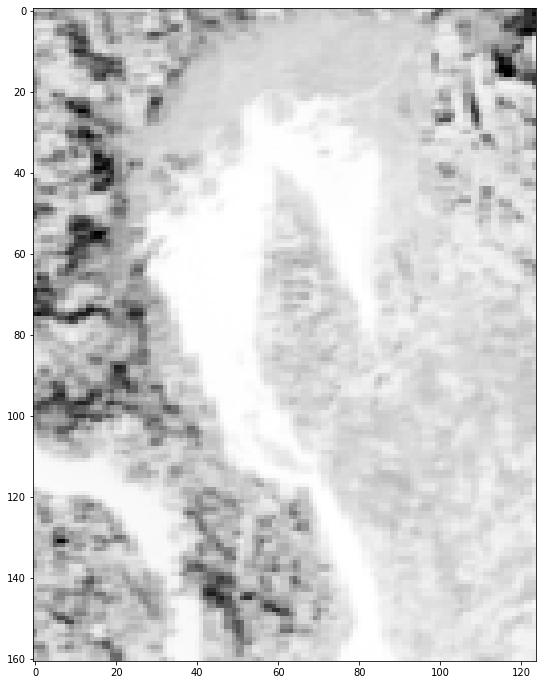

In [14]:
plotBand(image_subset, 'Oa09_radiance')

In [22]:
def reproject_product(product, crs='EPSG:4326'):
    """
    Return the product, projected with the selected 
    """

    HashMap = jpy.get_type('java.util.HashMap') 
    parameters = HashMap()
    
    parameters.put('crs', crs) 
    parameters.put('noDataValue', 0.0)

    return GPF.createProduct('Reproject', parameters, product)

In [23]:
p2 = reproject_product(p)

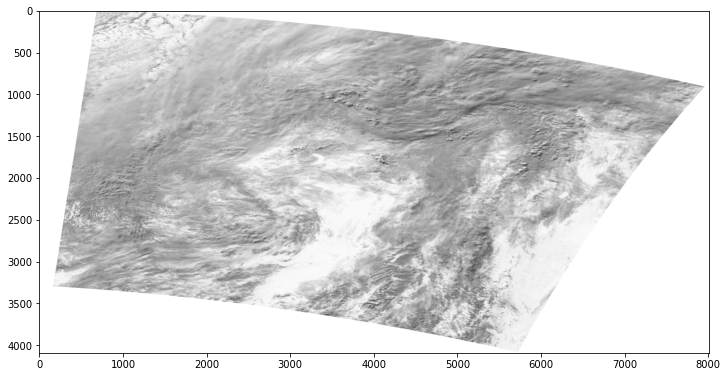

In [20]:
plotBand(p2, 'Oa08_radiance')

In [15]:
def plotRGB(product):
    red_radiance = product.getBand('Oa08_radiance')
    green_radiance = product.getBand('Oa06_radiance')
    blue_radiance = product.getBand('Oa04_radiance')
    
    w = red_radiance.getRasterWidth()
    h = red_radiance.getRasterHeight()
    
    red_radiance_data = np.zeros(w * h, np.float32)
    red_radiance.readPixels(0, 0, w, h, red_radiance_data)
    red_radiance_data.shape = h, w
    
    green_radiance_data = np.zeros(w * h, np.float32)
    green_radiance.readPixels(0, 0, w, h, green_radiance_data)
    green_radiance_data.shape = h, w
    
    blue_radiance_data = np.zeros(w * h, np.float32)
    blue_radiance.readPixels(0, 0, w, h, blue_radiance_data)
    blue_radiance_data.shape = h, w
    
    xmax=200
    red = (red_radiance_data*256/(xmax-np.amin(red_radiance_data)))
    green = (green_radiance_data*256/(xmax-np.amin(green_radiance_data)))
    blue = (blue_radiance_data*256/(xmax-np.amin(blue_radiance_data)))
    
    rgb_uint8 = np.dstack((red, green, blue)).astype(np.uint8) 
    
    width = 12
    height = 12
    plt.figure(figsize=(width, height))
    img = Image.fromarray(rgb_uint8)
    imgplot = plt.imshow(img)

In [78]:
opSpi = GPF.getDefaultInstance().getOperatorSpiRegistry().getOperatorSpi("c2rcc.olci")

paramDescList = opSpi.getOperatorDescriptor().getParameterDescriptors()
for param in paramDescList:
  print(param.getName())

validPixelExpression
salinity
temperature
ozone
press
TSMfakBpart
TSMfakBwit
CHLexp
CHLfak
thresholdRtosaOOS
thresholdAcReflecOos
thresholdCloudTDown865
atmosphericAuxDataPath
alternativeNNPath
outputAsRrs
deriveRwFromPathAndTransmittance
useEcmwfAuxData
outputRtoa
outputRtosaGc
outputRtosaGcAann
outputRpath
outputTdown
outputTup
outputAcReflectance
outputRhown
outputOos
outputKd
outputUncertainties


In [9]:
def run_c2rcc(product):
    """
    Run C2RCC on the product 
    """

    HashMap = jpy.get_type('java.util.HashMap') 
    parameters = HashMap()

    parameters.put('validPixelExpression', '!quality_flags.invalid && (!quality_flags.land || quality_flags.fresh_inland_water)')
    parameters.put('temperature', 15.0)
    parameters.put('salinity', 35.0)
    parameters.put('ozone', 330.0)
    parameters.put('press', 1000.0)
    parameters.put('TSMfakBpart', 1.72)
    parameters.put('TSMfakBwit', 3.1)
    parameters.put('CHLexp', 1.04)
    parameters.put('CHLfak', 21.0)
    parameters.put('thresholdRtosaOOS', 0.005)
    parameters.put('thresholdAcReflecOos', 0.1)
    parameters.put('thresholdCloudTDown865', 0.955)
    parameters.put('outputAsRrs', True)
    parameters.put('deriveRwFromPathAndTransmittance', True)
    parameters.put('useEcmwfAuxData', True)
    parameters.put('outputRtoa', True)
    parameters.put('outputRtosaGc', True)
    parameters.put('outputRtosaGcAann', True)
    parameters.put('outputRpath', True)
    parameters.put('outputTdown', True)
    parameters.put('outputTup', True)
    parameters.put('outputAcReflectance', True)
    parameters.put('outputRhown', True)
    parameters.put('outputOos', True)
    parameters.put('outputKd', True)
    parameters.put('outputUncertainties', True)

    # opSpi = GPF.getDefaultInstance().getOperatorSpiRegistry().getOperatorSpi("c2rcc.olci")
    
    return GPF.createProduct('c2rcc.olci', parameters, product)

In [10]:
result = run_c2rcc(image_subset)

In [11]:
# print(list(result.getBands()))

In [12]:
write_format = 'NetCDF4-CF' # BEAM-DIMAP, GeoTIFF, GeoTIFF-BigTIFF

# ProductIO.getProductWriter('GeoTIFF')
ProductIO.writeProduct(result, './output.nc', write_format)

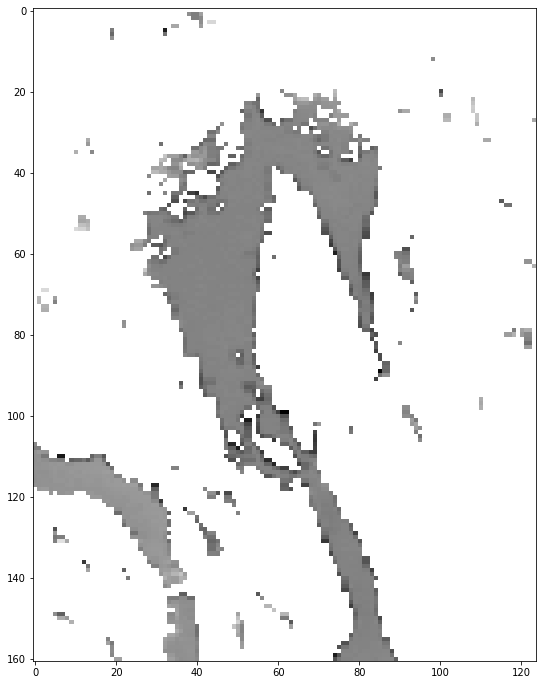

In [47]:
plotBand(result, 'iop_apig')

In [29]:
xdata = xr.open_dataset("output.nc")

In [30]:
xdata['iop_apig_adj'] = np.power(xdata['iop_apig'], 1.04) * 21

In [31]:
xdata['iop_apig_adj']

<xarray.DataArray 'iop_apig_adj' (y: 161, x: 124)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    lat      (y, x) float64 ...
    lon      (y, x) float64 ...
Dimensions without coordinates: y, x

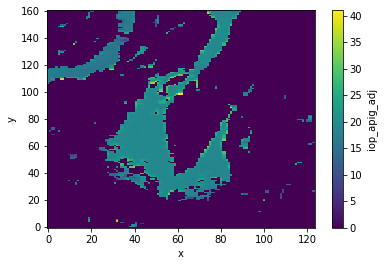

In [32]:
xdata['iop_apig_adj'].plot()

In [35]:
xdata.sel(lon=10.808619, lat=59.994049, method='nearest')

ValueError: dimensions or multi-index levels ['lon', 'lat'] do not exist